# Exercise 5.2: Heat Maps, Spatial Charts, and Contour Charts
#### Scott Breitbach
#### DSC640 - 02/07/2022

# Plots Using **Python**

## Load Data

In [2]:
# Load lib raries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load data
costcos = pd.read_csv("costcos-geocoded.csv")
ballers = pd.read_csv("ppg2008.csv")

# Set color to Bellevue purple
color = "#4f3674"

<div style="page-break-after: always;"></div>

## Heat Map

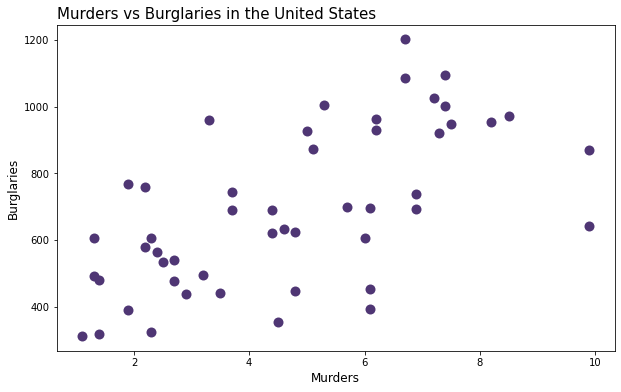

In [3]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(10, 6))

# Create a Scatterplot
plt.plot('murder', 'burglary', data=crimeDF, linestyle='none', markersize=10, 
         markerfacecolor=color, marker='o', markeredgecolor="none")

# Add chart title and labels
plt.title("Murders vs Burglaries in the United States", fontsize = 15, loc = 'left')
plt.xlabel("Murders", fontsize = 12)
plt.ylabel("Burglaries", fontsize = 12)

plt.show()

<div style="page-break-after: always;"></div>

## Spatial Chart

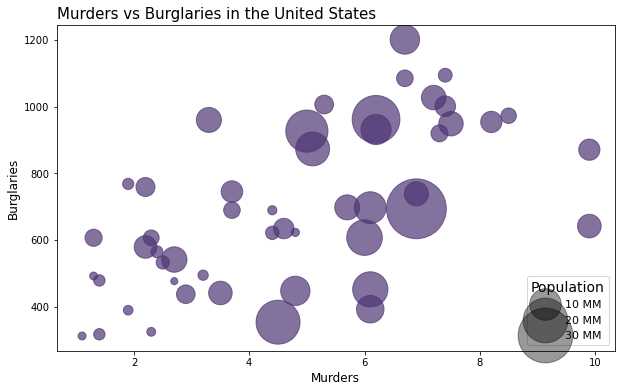

In [4]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(10, 6))

# Make a bubble plot
sc = plt.scatter('murder', 'burglary', s=crimeDF.population*.0001, data=crimeDF, 
                 alpha=0.7, color=color, label='Population')

# Add chart title and labels
plt.title("Murders vs Burglaries in the United States", fontsize = 15, loc = 'left')
plt.xlabel("Murders", fontsize = 12)
plt.ylabel("Burglaries", fontsize = 12)

# Set legend for population sizes                   
handles, labels = sc.legend_elements(prop="sizes", alpha=0.4, num=3)     
labels = ["10 MM", "20 MM", "30 MM"]     
legend = ax.legend(handles, labels, loc="lower right", title="Population", 
                   fontsize=11, title_fontsize=14) 

plt.show()

<div style="page-break-after: always;"></div>

## Contour Chart

Text(0, 0.5, 'Density')

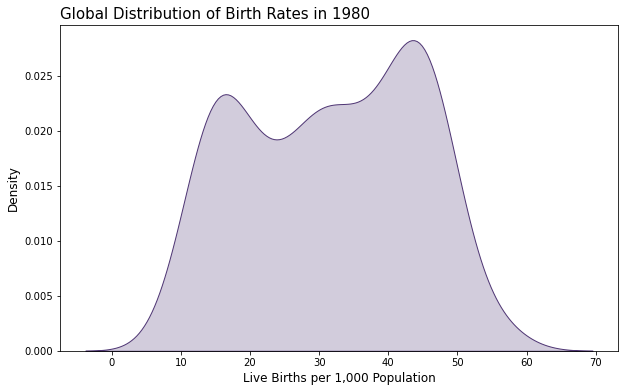

In [5]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(10, 6))

# Make a density plot
sns.kdeplot(birthDF['1980'], color=color, fill=color)

# Add chart title and labels
plt.title("Global Distribution of Birth Rates in 1980", fontsize = 15, loc = 'left')
plt.xlabel("Live Births per 1,000 Population", fontsize = 12)
plt.ylabel("Density", fontsize = 12)